# **Training with balanced and unbalanced dataset**

In [1]:
# Importar las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA # Importando PCA
from sklearn.preprocessing import StandardScaler # Estandarizar los datos

## **Cargar datos desbalanceados**

La base de datos fue obtenida del repositorio de Kaggle: Credit Fraud || Dealing with Imbalanced Datasets


https://www.kaggle.com/code/janiobachmann/credit-fraud-dealing-with-imbalanced-datasets/input?select=creditcard.csv

In [2]:
from google.colab import drive # Importando drive
drive.mount('/content/drive') # Montando drive

Mounted at /content/drive


In [3]:
cfraud_data = pd.read_csv('/content/drive/MyDrive/Artificial Intelligence/creditcard.csv')
cfraud_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
cfraud_data.shape # El dataframe tiene 28 columnas con diferentes características

(284807, 31)

In [5]:
cfraud_data["Class"].value_counts() # Se observa el desbalanceo. Del total de datos el 0.17% pertenecen a la clase 1

,count
Class,
0,284315
1,492


In [6]:
# Guardar la columna de clases
clases = cfraud_data["Class"]
clases

,Class
0,0
1,0
2,0
3,0
4,0
...,...
284802,0
284803,0
284804,0
284805,0


In [7]:
# Filtrando dataframe para que queden solo las 28 features
features_data = cfraud_data[cfraud_data.columns[1:29]]
features_data

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533


In [8]:
# Usando PCA para reducir las 28 features a solo dos (y poder graficarlos)

# Normalizar los datos
scaler = StandardScaler() # Crea instancia de un objeto
features_data_escalados = scaler.fit_transform(features_data)

pca = PCA(n_components=2)
pca_resultados = pca.fit_transform(features_data_escalados)
pca_resultados # Estas son las dos componentes que voy a usar para el entrenamiento

array([[ 0.23955956,  0.24700418],
       [ 0.37942428, -0.0370567 ],
       [-0.39725816,  1.49782505],
       ...,
       [ 0.22089562,  0.4557809 ],
       [ 0.04975195, -0.02436191],
       [ 0.08646586,  0.69745841]])

In [9]:
# Hacer un dataframe con las columnas que arrojó PCA
data = pd.DataFrame(pca_resultados, columns=["Feature1", "Feature2"])
data

,Feature1,Feature2
0,0.239560,0.247004
1,0.379424,-0.037057
2,-0.397258,1.497825
3,-0.275671,2.819668
4,-0.508971,0.064410
...,...,...
284802,2.123023,-1.621276
284803,-0.276065,0.096849
284804,0.220896,0.455781
284805,0.049752,-0.024362


In [10]:
# Unir las clases al dataframe
data = pd.concat([data, clases], axis=1)
data.rename(columns={'Class': 'Target'}, inplace=True) # Reemplaza el nombre de la última columna
data

,Feature1,Feature2,Target
0,0.239560,0.247004,0
1,0.379424,-0.037057,0
2,-0.397258,1.497825,0
3,-0.275671,2.819668,0
4,-0.508971,0.064410,0
...,...,...,...
284802,2.123023,-1.621276,0
284803,-0.276065,0.096849,0
284804,0.220896,0.455781,0
284805,0.049752,-0.024362,0


## **Visualizando el desbalance**

Distribución de las clases:
Target
0    284315
1       492
Name: count, dtype: int64


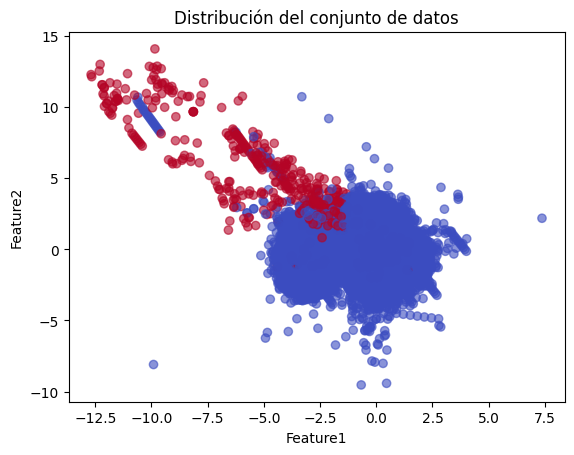

In [11]:
# Visualización inicial
print("Distribución de las clases:")
print(data["Target"].value_counts())

# Graficar la distribución de datos
plt.scatter(data["Feature1"], data["Feature2"], c=data["Target"], cmap="coolwarm", alpha=0.6)
plt.title("Distribución del conjunto de datos")
plt.xlabel("Feature1")
plt.ylabel("Feature2")
plt.show()

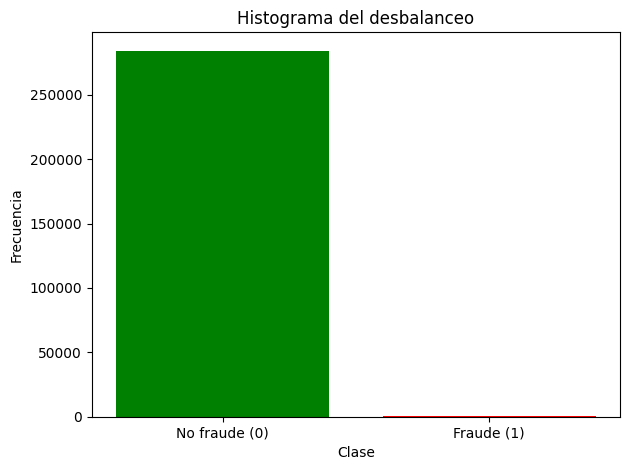

In [12]:
# Presentando un histograma para ver la comparación más fácilmente
clases_counts = clases.value_counts() # Cuenta la frecuencia de cada clase
tipos_clases = [0, 1]

#plt.figure(figsize=(6, 8)) # Ajusta el tamaño
plt.bar(tipos_clases, clases_counts, color=['green', 'red'])
plt.title("Histograma del desbalanceo")
plt.xlabel("Clase")
plt.ylabel("Frecuencia")
plt.xticks(tipos_clases, labels = ["No fraude (0)", "Fraude (1)"])  # Asegurarse que en la parte de abajo aparezcan las dos clases
plt.tight_layout()  # Ajusta la vista
plt.show()

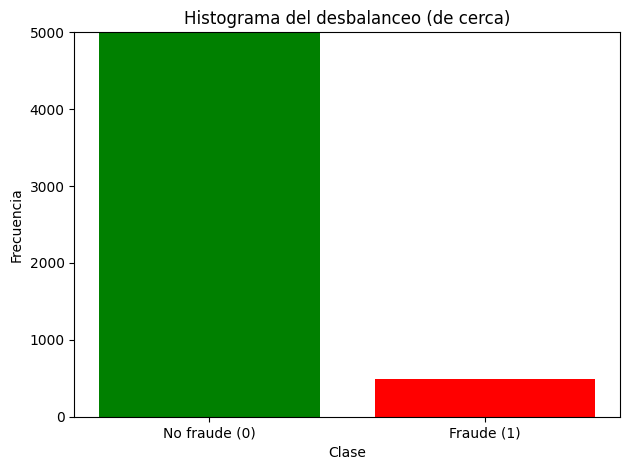

In [13]:
# Viendo los histogramas más de cerca

#plt.figure(figsize=(6, 8)) # Ajusta el tamaño
plt.ylim((0,5000))
plt.bar(tipos_clases, clases_counts, color=['green', 'red'])
plt.title("Histograma del desbalanceo (de cerca)")
plt.xlabel("Clase")
plt.ylabel("Frecuencia")
plt.xticks(tipos_clases, labels = ["No fraude (0)", "Fraude (1)"])  # Asegurarse que en la parte de abajo aparezcan las dos clases
plt.tight_layout()  # Ajusta la vista
plt.show()

## **Entrenamiento sin preprocesamiento**

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(data[["Feature1", "Feature2"]],
                                                    data["Target"], test_size=0.3, random_state=184)

# Entrenar el modelo
model = LogisticRegression()
model.fit(X_train, y_train)

# Predicción y evaluación
y_pred = model.predict(X_test)
print("Reporte de clasificación (modelo desbalanceado):")
print(classification_report(y_test, y_pred))


# Los datos están sumamente desbalanceados, por lo que el modelo tiende a predecir mejor
# los de la clase mayoritaria.
# La precisión de los elementos de la clase 1 es mejor pero porque tiene que recononcer
# menos elementos.

Reporte de clasificación (modelo desbalanceado):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85269
           1       0.80      0.33      0.47       174

    accuracy                           1.00     85443
   macro avg       0.90      0.66      0.73     85443
weighted avg       1.00      1.00      1.00     85443



## **Entrenamiento con balance de datos**

In [19]:
# Entrenamiento con balance de datos
from imblearn.over_sampling import SMOTE

# Aplicar SMOTE
smote = SMOTE(random_state=184)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Entrenar el modelo con datos balanceados
model.fit(X_resampled, y_resampled)
y_pred_resampled = model.predict(X_test)

# Evaluar el modelo balanceado
print("Reporte de clasificación (modelo balanceado):")
print(classification_report(y_test, y_pred_resampled))


# El recall y el f1-score de la clase 0 bajan un poco porque el modelo empieza a prestar
# atención a los elementos de la clase 1. El recall de la clase cero aumenta.

# Nota: El modelo presta atención a los elementos de ambas clases

Reporte de clasificación (modelo balanceado):
              precision    recall  f1-score   support

           0       1.00      0.94      0.97     85269
           1       0.03      0.80      0.05       174

    accuracy                           0.94     85443
   macro avg       0.51      0.87      0.51     85443
weighted avg       1.00      0.94      0.97     85443

